# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

import warnings
warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = btc_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
total_cryto_value = my_btc_value + my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $64814.40
The current value of your 5.3 ETH is $12456.32


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2024-04-19", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
current_portfolio_df = api.get_bars(tickers, timeframe, start=today, end=today).df

# Reorganize the DataFrame
# Separate ticker data
agg_df = current_portfolio_df[current_portfolio_df['symbol']=='AGG'].drop(columns='symbol')
spy_df = current_portfolio_df[current_portfolio_df['symbol']=='SPY'].drop(columns='symbol')

# Concatenate the ticker DataFrames
portfolio_concat_df = pd.concat([agg_df, spy_df], axis=1, keys=['AGG', 'SPY'])

# Preview DataFrame
portfolio_concat_df

AGG                                            \
                           close   high    low trade_count   open   volume   
timestamp                                                                    
2024-04-19 04:00:00+00:00  95.38  95.55  95.33       25285  95.53  9121718   

                                         SPY                               \
                                vwap   close     high     low trade_count   
timestamp                                                                   
2024-04-19 04:00:00+00:00  95.407918  495.16  500.455  493.86      756686   

                                                          
                             open     volume        vwap  
timestamp                                                 
2024-04-19 04:00:00+00:00  499.44  102212587  496.836977

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(current_portfolio_df[current_portfolio_df['symbol']=='AGG']['close'].iloc[0])
spy_close_price = float(current_portfolio_df[current_portfolio_df['symbol']=='SPY']['close'].iloc[0])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $95.38
Current SPY closing price: $495.16


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $24758.00
The current value of your 200 AGG shares is $19076.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_crypto_value = my_eth_value + my_btc_value
total_shares_value = my_agg_value + my_spy_value
savings_data = [total_crypto_value, total_shares_value]

# Create savings DataFrame
savings_df = pd.DataFrame(savings_data, columns=['Amount'], index=['Crypto', 'Stock/Bond'])

# Display savings DataFrame
savings_df

,Amount
Crypto,77270.725
Stock/Bond,43834.000


<Axes: title={'center': 'Composition of Personal Savings'}, ylabel='Amount'>

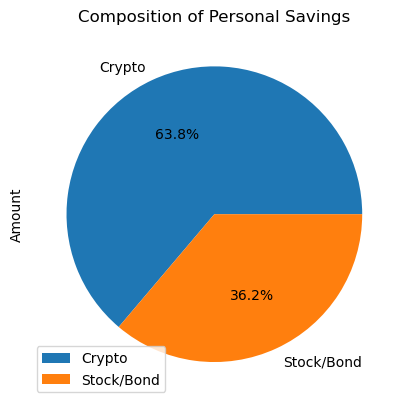

In [13]:
# Plot savings pie chart
savings_df.plot.pie(y='Amount', title='Composition of Personal Savings', autopct='%1.1f%%')

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_portfolio_value = savings_df['Amount'].sum()

# Validate saving health
if total_portfolio_value > emergency_fund:
    print("Congratulations! You have enough money in this fund.")
elif total_portfolio_value == emergency_fund:
    print("Congratulations on reaching this important financial goal.")
else:
    shortfall = emergency_fund - total_portfolio_value
    print(f"You are ${shortfall} away from reaching your emergency fund goal.")

Congratulations! You have enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
five_yr_df = api.get_bars(tickers, timeframe, start=start_date, end=end_date).df

# Reorganize the DataFrame
# Separate ticker data
five_yr_spy_df = five_yr_df[five_yr_df['symbol']=='SPY'].drop(columns='symbol')
five_yr_agg_df = five_yr_df[five_yr_df['symbol']=='AGG'].drop(columns='symbol')

# Concatenate the ticker DataFrames
five_yr_stock_data = pd.concat([five_yr_spy_df, five_yr_agg_df], axis=1, keys=['SPY', 'AGG'])

# Display sample data
five_yr_stock_data.head()

SPY                                      \
                              close    high     low trade_count    open   
timestamp                                                                 
2016-05-02 04:00:00+00:00  207.9700  208.18  206.41      263586  206.92   
2016-05-03 04:00:00+00:00  206.1592  206.80  205.28      377523  206.52   
2016-05-04 04:00:00+00:00  205.0100  205.85  204.42      345266  204.99   
2016-05-05 04:00:00+00:00  204.9700  205.98  204.47      280626  205.56   
2016-05-06 04:00:00+00:00  205.7200  205.77  203.88      340162  204.06   

                                                      AGG                      \
                              volume        vwap    close      high       low   
timestamp                                                                       
2016-05-02 04:00:00+00:00   64747229  207.305695  110.605  110.7400  110.5200   
2016-05-03 04:00:00+00:00  108050343  206.309997  110.810  110.9450  110.7500   
2016-05-04 04:00:00+00:00   94995641  205.086315  110.860  110.9315  110.7595   
2016-05-05 04:00:00+00:00   68425268  205.140615  111.140  111.1600  110.8010   
2016-05-06 04:00:00+00:00   90999800  204.943796  110.970  111.1200  110.9700   

                                                                    
                          trade_count    open   volume        vwap  
timestamp                                                           
2016-05-02 04:00:00+00:00       15122  110.74  3608552  110.626939  
2016-05-03 04:00:00+00:00       15663  110.89  3128774  110.864495  
2016-05-04 04:00:00+00:00       13984  110.91  3096337  110.877983  
2016-05-05 04:00:00+00:00       15708  110.92  3052967  111.030002  
2016-05-06 04:00:00+00:00       12697  111.12  2922700  111.027631

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
monte_carlo_sim = MCSimulation(
    portfolio_data = five_yr_stock_data,
    weights = [0.6, 0.4],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [19]:
# Printing the simulation input data
monte_carlo_sim.portfolio_data.head()

SPY                                      \
                              close    high     low trade_count    open   
timestamp                                                                 
2016-05-02 04:00:00+00:00  207.9700  208.18  206.41      263586  206.92   
2016-05-03 04:00:00+00:00  206.1592  206.80  205.28      377523  206.52   
2016-05-04 04:00:00+00:00  205.0100  205.85  204.42      345266  204.99   
2016-05-05 04:00:00+00:00  204.9700  205.98  204.47      280626  205.56   
2016-05-06 04:00:00+00:00  205.7200  205.77  203.88      340162  204.06   

                                                                   AGG  \
                              volume        vwap daily_return    close   
timestamp                                                                
2016-05-02 04:00:00+00:00   64747229  207.305695          NaN  110.605   
2016-05-03 04:00:00+00:00  108050343  206.309997    -0.008707  110.810   
2016-05-04 04:00:00+00:00   94995641  205.086315    -0.005574  110.860   
2016-05-05 04:00:00+00:00   68425268  205.140615    -0.000195  111.140   
2016-05-06 04:00:00+00:00   90999800  204.943796     0.003659  110.970   

                                                                            \
                               high       low trade_count    open   volume   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.7400  110.5200       15122  110.74  3608552   
2016-05-03 04:00:00+00:00  110.9450  110.7500       15663  110.89  3128774   
2016-05-04 04:00:00+00:00  110.9315  110.7595       13984  110.91  3096337   
2016-05-05 04:00:00+00:00  111.1600  110.8010       15708  110.92  3052967   
2016-05-06 04:00:00+00:00  111.1200  110.9700       12697  111.12  2922700   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  110.626939          NaN  
2016-05-03 04:00:00+00:00  110.864495     0.001853  
2016-05-04 04:00:00+00:00  110.877983     0.000451  
2016-05-05 04:00:00+00:00  111.030002     0.002526  
2016-05-06 04:00:00+00:00  111.027631    -0.001530

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
monte_carlo_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992682,1.009672,0.989690,1.004241,1.004059,1.012776,0.994634,0.994299,1.003528,1.001780,...,1.002557,1.002114,1.000372,1.004430,1.001570,0.990027,1.001326,0.990503,1.012559,1.012837
2,0.995030,1.011732,0.985564,1.014435,1.015099,1.013028,1.002988,1.001655,0.992240,1.001072,...,1.001055,0.997274,0.998239,1.013177,0.999495,0.992563,0.993450,0.993347,1.017020,1.010375
3,0.995986,1.008292,0.982554,1.012026,1.019693,1.003787,0.998164,0.986235,0.994405,1.009921,...,1.010108,0.998397,0.993207,1.011196,1.008119,0.985799,0.987607,0.993282,1.022214,1.006594
4,0.996055,1.018716,0.985371,0.995930,1.005635,0.992175,0.992736,0.975599,0.992746,1.006734,...,1.014750,1.005270,0.980571,1.023435,1.004888,0.976834,0.985529,0.991506,1.024318,0.997986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.814590,6.462729,24.124588,8.040285,17.680979,14.491532,10.449975,30.746204,34.926304,28.932992,...,33.710405,23.483495,10.058276,14.489929,7.034447,2.100855,6.145924,7.135252,19.322420,32.346660
7557,7.864578,6.495730,24.255785,8.077723,17.848189,14.441917,10.441615,30.585446,35.403267,28.794470,...,33.982511,23.448172,10.078758,14.555277,7.051074,2.100088,6.152143,7.047491,19.211310,32.584628
7558,7.863035,6.460324,24.211940,8.112421,18.024883,14.411987,10.576954,30.437529,35.364381,28.881975,...,34.125325,23.623033,10.130738,14.502293,7.100547,2.078364,6.168863,7.083864,19.008689,32.578340
7559,7.911070,6.435717,24.170868,8.029823,17.906652,14.620832,10.487984,30.683466,35.670127,28.682939,...,34.216953,24.025917,10.125119,14.609561,7.108394,2.102524,6.197330,7.062392,18.905025,32.534723


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

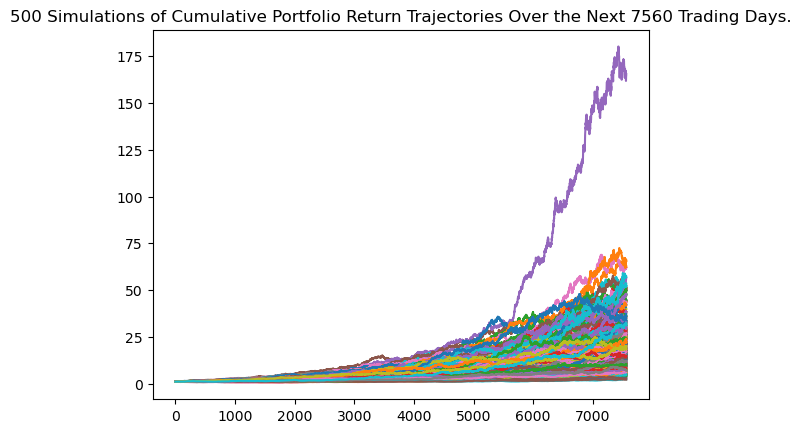

In [21]:
# Plot simulation outcomes
monte_carlo_sim.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

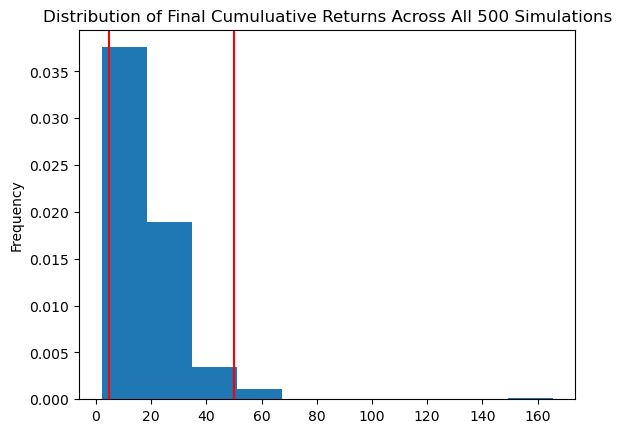

In [22]:
# Plot probability distribution and confidence intervals
monte_carlo_sim.plot_distribution()

### Retirement Analysis

In [28]:
# Updated Method
class MonteCarloSimulation:
    def __init__(self, simulated_return, confidence_interval):
        self.simulated_return = simulated_return
        self.confidence_interval = confidence_interval

    def summarize_cumulative_return(self):
        metrics = self.simulated_return.iloc[-1].describe()
        ci_series = self.confidence_interval
        ci_series.index = ["95% CI Lower", "95% CI Upper"]
        return pd.concat([metrics, ci_series])

simulated_return = pd.DataFrame({
    'simulation_1': [1.05, 1.10, 1.20],
    'simulation_2': [1.03, 1.15, 1.18]
})

confidence_interval = pd.Series([1.15, 1.25], index=["Lower", "Upper"])

monte_carlo_sim = MonteCarloSimulation(simulated_return, confidence_interval)

# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = monte_carlo_sim.summarize_cumulative_return()

CI_lower = summary_stats.loc["95% CI Lower"]
CI_upper = summary_stats.loc["95% CI Upper"]

# Print the lower and upper bounds of the 95% confidence interval
print(f"Lower Bound of the 95% Confidence Interval: ${CI_lower}")
print(f"Upper Bound of the 95% Confidence Interval: ${CI_upper}")

# Print summary statistics
print(summary_stats)

Lower Bound of the 95% Confidence Interval: $1.15
Upper Bound of the 95% Confidence Interval: $1.25
count           2.000000
mean            1.190000
std             0.014142
min             1.180000
25%             1.185000
50%             1.190000
75%             1.195000
max             1.200000
95% CI Lower    1.150000
95% CI Upper    1.250000
dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
CI_lower = round(summary_stats.iloc[8] * initial_investment, 2)
CI_upper = round(summary_stats.iloc [9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${CI_lower} and ${CI_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $23000.0 and $25000.0


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [30]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
CI_lower = round(summary_stats.iloc[8] * initial_investment, 2)
CI_upper = round(summary_stats.iloc[9] * initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${CI_lower} and ${CI_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $34500.0 and $37500.0


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
ER_monte_carlo_sim = MCSimulation(
    portfolio_data = five_yr_stock_data,
    weights = [0.6, 0.4],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [32]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
ER_monte_carlo_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003308,1.011837,1.004712,0.994354,1.007482,0.999263,1.011304,0.995436,0.997945,0.992197,...,1.001691,0.997205,1.005428,1.000041,1.008338,0.999418,1.004456,0.997868,1.006755,0.992886
2,1.005400,1.016887,1.009680,0.994905,1.001848,0.994391,1.013821,1.002369,1.007249,0.989419,...,1.000710,0.991192,1.008513,0.994733,1.008005,0.989610,1.003788,0.994413,1.024287,0.996779
3,0.997911,1.027454,1.017144,0.988261,1.000978,1.006073,1.012056,1.006824,1.004597,0.999281,...,1.001134,0.994346,1.012379,0.990557,1.010281,0.990604,0.998688,1.005854,1.026224,0.999617
4,0.979555,1.033349,1.016668,0.985383,0.989842,1.005514,1.019158,1.005197,1.001309,0.997759,...,1.004553,0.992086,1.020194,0.997514,1.012419,0.990355,0.999029,0.997696,1.025177,0.993046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.177882,1.971253,1.552726,2.083923,1.942740,1.522569,1.283323,1.313385,1.942752,0.737836,...,1.765527,1.939605,1.835389,1.494721,1.726665,2.983901,1.329110,2.536476,1.300781,1.522908
1257,2.170738,2.009451,1.564093,2.086633,1.912118,1.529285,1.279536,1.308121,1.943303,0.745342,...,1.760826,1.945719,1.822906,1.505282,1.731515,2.978507,1.312976,2.567319,1.285801,1.526290
1258,2.147463,2.001050,1.564342,2.109237,1.911509,1.525243,1.281314,1.314775,1.932435,0.745718,...,1.770034,1.953785,1.803395,1.487991,1.719841,2.996078,1.319177,2.545314,1.270962,1.518653
1259,2.130243,2.027225,1.576760,2.098268,1.930282,1.527353,1.296031,1.321411,1.913200,0.745955,...,1.768639,1.951235,1.782707,1.499786,1.720108,3.018978,1.317691,2.517707,1.279416,1.526538


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

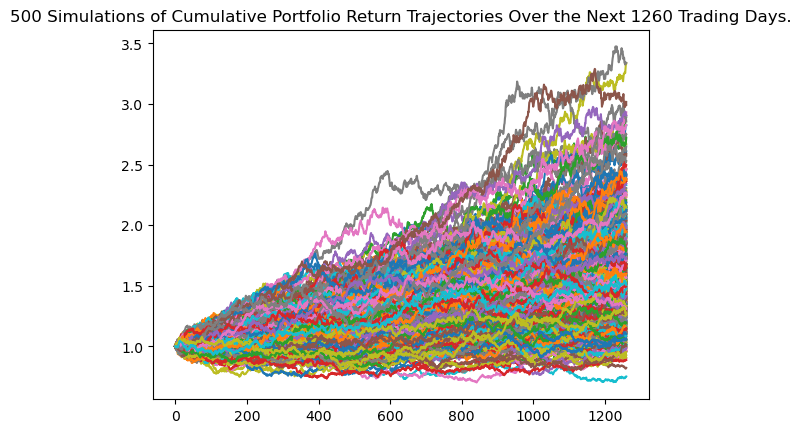

In [33]:
# Plot simulation outcomes
ER_monte_carlo_sim.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

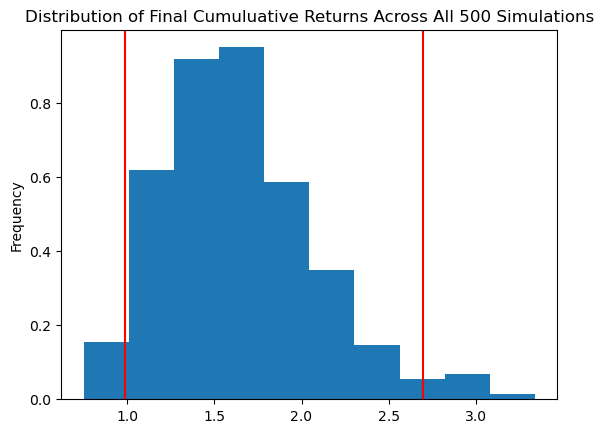

In [34]:
# Plot probability distribution and confidence intervals
ER_monte_carlo_sim.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
class MonteCarloSimulation:
    def __init__(self, simulated_return, confidence_interval):
        self.simulated_return = simulated_return
        self.confidence_interval = confidence_interval

    def summarize_cumulative_return(self):
        metrics = self.simulated_return.iloc[-1].describe()
        ci_series = self.confidence_interval
        ci_series.index = ["95% CI Lower", "95% CI Upper"]
        return pd.concat([metrics, ci_series])

simulated_return = pd.DataFrame({
    'simulation_1': [1.05, 1.10, 1.20],
    'simulation_2': [1.03, 1.15, 1.18]
})

confidence_interval = pd.Series([1.15, 1.25], index=["Lower", "Upper"])

ER_monte_carlo_sim = MonteCarloSimulation(simulated_return, confidence_interval)

# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = ER_monte_carlo_sim.summarize_cumulative_return()

ER_CI_lower = summary_stats.loc["95% CI Lower"]
ER_CI_upper = summary_stats.loc["95% CI Upper"]

# Print the lower and upper bounds of the 95% confidence interval
print(f"Lower Bound of the 95% Confidence Interval: ${CI_lower}")
print(f"Upper Bound of the 95% Confidence Interval: ${CI_upper}")

# Print summary statistics
print(summary_stats)

Lower Bound of the 95% Confidence Interval: $1.15
Upper Bound of the 95% Confidence Interval: $1.25
count           2.000000
mean            1.190000
std             0.014142
min             1.180000
25%             1.185000
50%             1.190000
75%             1.195000
max             1.200000
95% CI Lower    1.150000
95% CI Upper    1.250000
dtype: float64


In [39]:
# Set initial investment
ER_initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ER_CI_lower = round(summary_stats.iloc[8] * initial_investment, 2)
ER_CI_upper = round(summary_stats.iloc[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${ER_initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${CI_lower} and ${CI_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $1.15 and $1.25


### Ten Years Retirement Option

In [45]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
TYR_monte_carlo_sim = MCSimulation(
    portfolio_data = five_yr_stock_data,
    weights = [0.6, 0.4],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [46]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
TYR_monte_carlo_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994454,0.986394,0.995352,0.997650,0.985594,1.003571,0.996207,0.997991,1.000428,1.005034,...,1.000832,1.000173,0.994934,1.005452,1.005167,1.002649,1.002278,1.000544,0.990739,0.997242
2,1.001848,0.998326,1.003005,1.003160,0.973429,1.006684,0.993850,0.995650,0.993604,1.002131,...,1.004129,0.995103,1.012225,1.011044,1.002076,1.010247,1.005639,0.997772,0.989968,0.991497
3,1.010512,0.999413,0.992599,1.006886,0.964821,1.002507,0.994855,0.994720,1.003245,0.995491,...,1.003163,0.995623,1.010881,1.026900,1.011863,1.021074,1.012646,1.001686,0.995658,0.989432
4,1.003352,1.001704,0.988477,1.003766,0.963106,1.009309,0.987266,0.981831,0.999359,0.995612,...,1.012415,0.999489,1.014662,1.029450,1.016537,1.021638,1.013400,1.007248,1.004414,0.981676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.003502,3.171295,2.223952,2.553931,1.982290,0.982552,3.224235,2.562701,2.542981,1.957669,...,2.000976,1.270378,2.643590,2.422039,3.883849,2.337314,2.672911,2.351427,3.984309,2.793778
2517,3.016522,3.151392,2.211527,2.572722,1.985534,0.990388,3.208476,2.574193,2.521927,1.956613,...,2.006716,1.256603,2.622035,2.428745,3.869166,2.332240,2.700338,2.361167,3.965051,2.831950
2518,3.055582,3.191751,2.221175,2.589841,1.989727,0.992906,3.249421,2.578137,2.532536,1.970920,...,2.013149,1.265294,2.633723,2.404427,3.863537,2.331984,2.683483,2.369818,3.956326,2.835127
2519,3.054954,3.218543,2.210258,2.551277,1.986506,0.989001,3.269221,2.573517,2.548041,1.961565,...,2.019648,1.247847,2.642814,2.399910,3.876186,2.348869,2.670229,2.365660,3.979662,2.833332


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

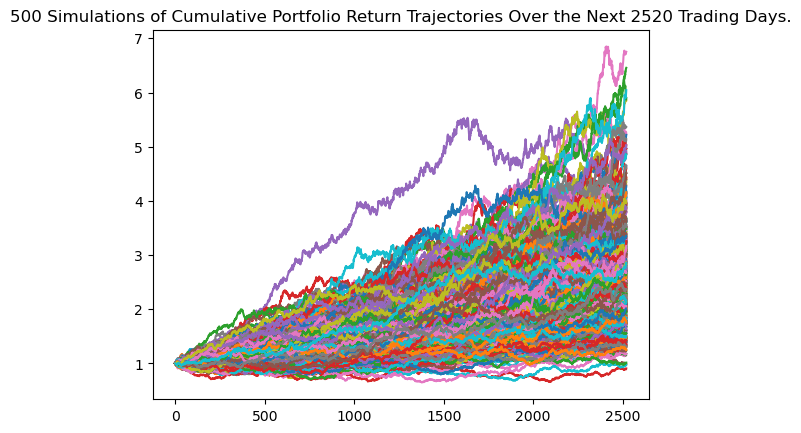

In [47]:
# Plot simulation outcomes
TYR_monte_carlo_sim.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

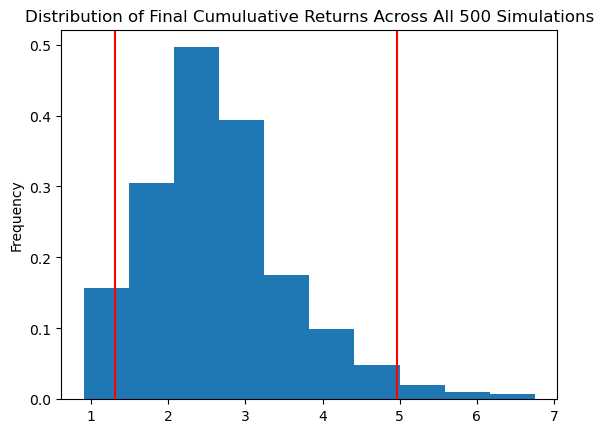

In [48]:
# Plot probability distribution and confidence intervals
TYR_monte_carlo_sim.plot_distribution()

In [49]:
# Fetch summary statistics from the Monte Carlo simulation results
class MonteCarloSimulation:
    def __init__(self, simulated_return, confidence_interval):
        self.simulated_return = simulated_return
        self.confidence_interval = confidence_interval

    def summarize_cumulative_return(self):
        metrics = self.simulated_return.iloc[-1].describe()
        ci_series = self.confidence_interval
        ci_series.index = ["95% CI Lower", "95% CI Upper"]
        return pd.concat([metrics, ci_series])

simulated_return = pd.DataFrame({
    'simulation_1': [1.05, 1.10, 1.20],
    'simulation_2': [1.03, 1.15, 1.18]
})

confidence_interval = pd.Series([1.15, 1.25], index=["Lower", "Upper"])

TYR_monte_carlo_sim = MonteCarloSimulation(simulated_return, confidence_interval)

# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = TYR_monte_carlo_sim.summarize_cumulative_return()

TYR_CI_lower = summary_stats.loc["95% CI Lower"]
TYR_CI_upper = summary_stats.loc["95% CI Upper"]

# Print the lower and upper bounds of the 95% confidence interval
print(f"Lower Bound of the 95% Confidence Interval: ${CI_lower}")
print(f"Upper Bound of the 95% Confidence Interval: ${CI_upper}")

# Print summary statistics
print(summary_stats)

Lower Bound of the 95% Confidence Interval: $1.15
Upper Bound of the 95% Confidence Interval: $1.25
count           2.000000
mean            1.190000
std             0.014142
min             1.180000
25%             1.185000
50%             1.190000
75%             1.195000
max             1.200000
95% CI Lower    1.150000
95% CI Upper    1.250000
dtype: float64


In [51]:
# Set initial investment
TYR_initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
TYR_CI_lower = round(summary_stats.iloc[8] * initial_investment, 2)
TYR_CI_upper = round(summary_stats.iloc[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${TYR_CI_lower} and ${TYR_CI_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $34500.0 and $37500.0
